## **Build a Machine Learning model to predict the date of payment of an invoice.**

In [459]:
#Importing the important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from datetime import date
import matplotlib.pyplot as plt
import datetime
% matplotlib inline

In [460]:
df=pd.read_csv("/content/1828220_HRC.csv") #Reading the data
df.head(3) #This will display the first 3 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200759878,SA corporation,2019-02-22 00:00:00,2019.0,1.928748e+09,2019-02-06,20190205,20190206,20190221.0,USD,RV,1.0,NaN,14653.42,20190206.0,NAH4,1.928748e+09,0
1,U001,0200744019,TARG trust,2019-12-31 00:00:00,2019.0,1.930284e+09,2019-12-15,20191216,20191215,20191230.0,USD,RV,1.0,NaN,66024.36,20191215.0,NAA8,1.930284e+09,0
2,U001,0200738514,KTA associates,2019-05-02 00:00:00,2019.0,1.928828e+09,2019-03-01,20190220,20190301,20190505.0,USD,RV,1.0,NaN,4063.35,20190301.0,NAGD,1.928828e+09,0


In [461]:
# number of unique values present in each column of the dataset
df.nunique()


business_code                 6
cust_number                1431
name_customer              4302
clear_date                  404
buisness_year                 2
doc_id                    50000
posting_date                498
document_create_date        502
document_create_date.1      498
due_in_date                 540
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         45124
baseline_create_date        502
cust_payment_terms           75
invoice_id                49995
isOpen                        2
dtype: int64

In [462]:
df.isOpen.value_counts() # To check the value count of isOpen ,from here

0    45345
1     4655
Name: isOpen, dtype: int64

## **Explonatory** **Data** **Analysis**

In [463]:
print(df.info()) #Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45345 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [464]:
data=df.copy() 

In [465]:
data.info()
#To know the info about the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45345 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [466]:
[col for col in data.columns if data[col].isnull().sum() > 0] # to know the columns that contain null values

['clear_date', 'area_business', 'invoice_id']

In [467]:
data.isnull().sum() 
#this will check the number of null values present in the particular column.

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 4655
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [468]:
#we are dropping the column that are not significant in the Dataframe 'Data' it is our dataset 
data.drop(columns=['area_business','cust_number','name_customer','doc_id',
          'document_create_date','posting_id','isOpen','invoice_id',
          'posting_date','baseline_create_date','business_code'],axis=1,inplace=True)

In [469]:
data.head() # here we can see that the columns are dropped 

,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
0,2019-02-22 00:00:00,2019.0,20190206,20190221.0,USD,RV,14653.42,NAH4
1,2019-12-31 00:00:00,2019.0,20191215,20191230.0,USD,RV,66024.36,NAA8
2,2019-05-02 00:00:00,2019.0,20190301,20190505.0,USD,RV,4063.35,NAGD
3,2019-10-15 00:00:00,2019.0,20191005,20191020.0,USD,RV,31655.14,NAH4
4,2019-07-03 00:00:00,2019.0,20190702,20190702.0,USD,RV,9488.40,NAB1


In [470]:
inv_cur={ 'USD':1, 'CAD':2 }
doc_typ={ 'RV':1, 'X2':2 }
#here we are assigning values

In [471]:
data['invoice_currency']=data['invoice_currency'].map(inv_cur)
data['document type']=data['document type'].map(doc_typ)
#mapping currency to document type because they have 2 categories

In [472]:
def change_currency(x):
  if x["invoice_currency"] == "CAD":
    x["total_open_amount"] *= 0.78
  return x
data = data.apply(change_currency, axis=1)
#conversion of the currency because this will affect the total_open_amount of the given dataset 
#because we have both type of values USD & CAD

In [473]:
data.describe(include='d') 

,buisness_year,due_in_date,total_open_amount
count,50000.000000,5.000000e+04,50000.000000
mean,2019.212540,2.019278e+07,32209.469456
std,0.409109,3.969369e+03,39116.207701
min,2019.000000,2.018123e+07,1.430000
25%,2019.000000,2.019051e+07,4774.470000
50%,2019.000000,2.019083e+07,17283.500000
75%,2019.000000,2.019122e+07,46920.115000
max,2020.000000,2.020071e+07,735251.640000


In [474]:
data["buisness_year"].unique()

array([2019., 2020.])

In [475]:
 #one hot categorical encoding using get_dummies
data = pd.get_dummies(data, columns=['cust_payment_terms'])
 # customer terms have 74 categories in this data

In [476]:
data['due_in_date'].astype(int,copy=True) #type onversion

0        20190221
1        20191230
2        20190505
3        20191020
4        20190702
           ...   
49995    20200610
49996    20200329
49997    20200323
49998    20200511
49999    20200303
Name: due_in_date, Length: 50000, dtype: int64

In [477]:
## now let's parse the dates, currently coded as strings, into datetime format
# this will allow us to make some analysis afterwards
data['due_in_date']=data['due_in_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
data['document_create_date.1']=data['document_create_date.1'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [478]:
# conversions document_create_date.1
data['month_document_create_date.1'] = data['document_create_date.1'].dt.month
data['day_document_create_date.1'] = data['document_create_date.1'].dt.day
data['year_document_create_date.1'] = data['document_create_date.1'].dt.year

In [479]:
#conversion due_in_date
data['month_due_in_date'] = data['due_in_date'].dt.month
data['day_due_in_date'] = data['due_in_date'].dt.day
data['year_due_in_date'] = data['due_in_date'].dt.year

In [480]:
#Test dataset
prediction_set =data[data['clear_date'].isnull()]
prediction_set.shape

(4655, 88)

In [481]:
df=df[df['clear_date'].notna()]
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200759878,SA corporation,2019-02-22 00:00:00,2019.0,1.928748e+09,2019-02-06,20190205,20190206,20190221.0,USD,RV,1.0,NaN,14653.42,20190206.0,NAH4,1.928748e+09,0
1,U001,0200744019,TARG trust,2019-12-31 00:00:00,2019.0,1.930284e+09,2019-12-15,20191216,20191215,20191230.0,USD,RV,1.0,NaN,66024.36,20191215.0,NAA8,1.930284e+09,0
2,U001,0200738514,KTA associates,2019-05-02 00:00:00,2019.0,1.928828e+09,2019-03-01,20190220,20190301,20190505.0,USD,RV,1.0,NaN,4063.35,20190301.0,NAGD,1.928828e+09,0
3,U001,0200769623,WAL-MAR in,2019-10-15 00:00:00,2019.0,1.929959e+09,2019-10-05,20191003,20191005,20191020.0,USD,RV,1.0,NaN,31655.14,20191005.0,NAH4,1.929959e+09,0
4,U001,0100032278,SI trust,2019-07-03 00:00:00,2019.0,1.929567e+09,2019-07-02,20190702,20190702,20190702.0,USD,RV,1.0,NaN,9488.40,20190702.0,NAB1,1.929567e+09,0


In [482]:
data=data[data['clear_date'].notna()] #not na values 

In [483]:
data.shape#To check the shape of data

(45345, 88)

In [484]:
#Date conversion
import datetime
data['clear_date_'] = pd.to_datetime(data.clear_date)
data[['clear_date','clear_date_']].head()

,clear_date,clear_date_
0,2019-02-22 00:00:00,2019-02-22
1,2019-12-31 00:00:00,2019-12-31
2,2019-05-02 00:00:00,2019-05-02
3,2019-10-15 00:00:00,2019-10-15
4,2019-07-03 00:00:00,2019-07-03


In [485]:
#Delay in date calculation
data['Delay']=data['clear_date_'] - data['due_in_date']

In [486]:
 data['Delay'] #printing the delay 

0        1 days
1        1 days
2       -3 days
3       -5 days
4        1 days
          ...  
45340    1 days
45341   -3 days
45342    9 days
45343    1 days
45344    3 days
Name: Delay, Length: 45345, dtype: timedelta64[ns]

In [487]:
#dropping the columns
data.drop(columns=['clear_date'],inplace=True,axis=1)
prediction_set.drop(columns=['clear_date'],inplace=True,axis=1)

In [488]:
data['Delay']=data['Delay'].dt.days.astype('int64')

In [489]:
data.head()

,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms_90M7,cust_payment_terms_B052,cust_payment_terms_B112,cust_payment_terms_BR12,cust_payment_terms_BR56,cust_payment_terms_C106,cust_payment_terms_C129,cust_payment_terms_CA10,cust_payment_terms_CA30,cust_payment_terms_CA60,cust_payment_terms_CAB1,cust_payment_terms_CAX2,cust_payment_terms_NA10,cust_payment_terms_NA25,cust_payment_terms_NA31,cust_payment_terms_NA32,cust_payment_terms_NA38,cust_payment_terms_NA3B,cust_payment_terms_NA3F,cust_payment_terms_NA84,cust_payment_terms_NA8Q,cust_payment_terms_NA9X,cust_payment_terms_NAA8,cust_payment_terms_NAAW,cust_payment_terms_NAAX,cust_payment_terms_NAB1,cust_payment_terms_NABG,cust_payment_terms_NAC6,cust_payment_terms_NACB,cust_payment_terms_NACE,cust_payment_terms_NACG,cust_payment_terms_NACH,cust_payment_terms_NAD1,cust_payment_terms_NAD4,...,cust_payment_terms_NATJ,cust_payment_terms_NATK,cust_payment_terms_NATL,cust_payment_terms_NATM,cust_payment_terms_NATU,cust_payment_terms_NATV,cust_payment_terms_NATW,cust_payment_terms_NATX,cust_payment_terms_NATZ,cust_payment_terms_NAU5,cust_payment_terms_NAUI,cust_payment_terms_NAUN,cust_payment_terms_NAUP,cust_payment_terms_NAUW,cust_payment_terms_NAUX,cust_payment_terms_NAUZ,cust_payment_terms_NAV2,cust_payment_terms_NAV9,cust_payment_terms_NAVC,cust_payment_terms_NAVD,cust_payment_terms_NAVE,cust_payment_terms_NAVF,cust_payment_terms_NAVL,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWK,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,month_document_create_date.1,day_document_create_date.1,year_document_create_date.1,month_due_in_date,day_due_in_date,year_due_in_date,clear_date_,Delay
0,2019.0,2019-02-06,2019-02-21,1,1,14653.42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,2019,2,21,2019,2019-02-22,1
1,2019.0,2019-12-15,2019-12-30,1,1,66024.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,15,2019,12,30,2019,2019-12-31,1
2,2019.0,2019-03-01,2019-05-05,1,1,4063.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2019,5,5,2019,2019-05-02,-3
3,2019.0,2019-10-05,2019-10-20,1,1,31655.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,5,2019,10,20,2019,2019-10-15,-5
4,2019.0,2019-07-02,2019-07-02,1,1,9488.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,2019,7,2,2019,2019-07-03,1


In [490]:
# To check Delay is there or not
  ## 0 : no delay
  ### 1 : delay
  ### 2 : before_time

def map_delay(x):
  if x['Delay']==0:
    return 0
  elif x['Delay']>0:
    return 1
  else:
    return 2

data['y_class']=data.apply(lambda x: map_delay(x),axis=1)

In [491]:
#data.clear_date=data.clear_date_

In [492]:
#Visulaization delay
import scipy.stats as stats
import pylab

In [493]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.show()

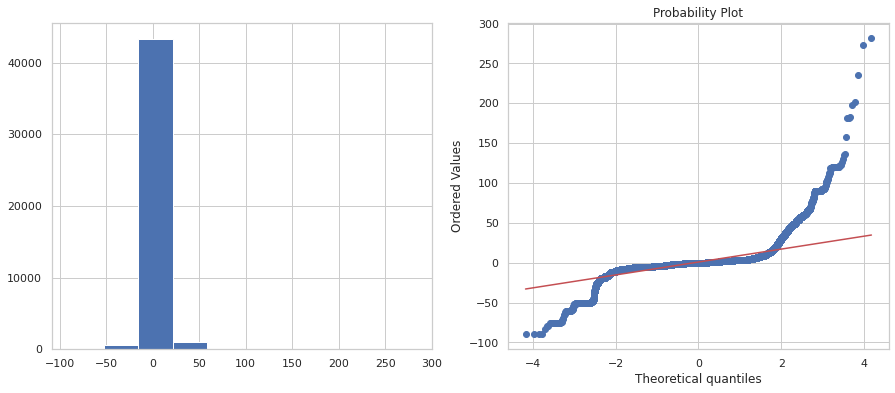

In [494]:
diagnostic_plots(data, 'Delay')

In [495]:
data.drop('clear_date_',inplace=True,axis=1)

In [496]:

data = data.drop(columns=['document_create_date.1','due_in_date'])

In [497]:
prediction_set = prediction_set.drop(columns=['document_create_date.1','due_in_date'])

In [498]:
data.shape

(45345, 87)

In [499]:
prediction_set.shape

(4655, 85)

In [500]:
#delay : reg and y_class: classification targets columns

In [501]:
data.head()

,buisness_year,invoice_currency,document type,total_open_amount,cust_payment_terms_90M7,cust_payment_terms_B052,cust_payment_terms_B112,cust_payment_terms_BR12,cust_payment_terms_BR56,cust_payment_terms_C106,cust_payment_terms_C129,cust_payment_terms_CA10,cust_payment_terms_CA30,cust_payment_terms_CA60,cust_payment_terms_CAB1,cust_payment_terms_CAX2,cust_payment_terms_NA10,cust_payment_terms_NA25,cust_payment_terms_NA31,cust_payment_terms_NA32,cust_payment_terms_NA38,cust_payment_terms_NA3B,cust_payment_terms_NA3F,cust_payment_terms_NA84,cust_payment_terms_NA8Q,cust_payment_terms_NA9X,cust_payment_terms_NAA8,cust_payment_terms_NAAW,cust_payment_terms_NAAX,cust_payment_terms_NAB1,cust_payment_terms_NABG,cust_payment_terms_NAC6,cust_payment_terms_NACB,cust_payment_terms_NACE,cust_payment_terms_NACG,cust_payment_terms_NACH,cust_payment_terms_NAD1,cust_payment_terms_NAD4,cust_payment_terms_NAD5,cust_payment_terms_NAD8,...,cust_payment_terms_NATJ,cust_payment_terms_NATK,cust_payment_terms_NATL,cust_payment_terms_NATM,cust_payment_terms_NATU,cust_payment_terms_NATV,cust_payment_terms_NATW,cust_payment_terms_NATX,cust_payment_terms_NATZ,cust_payment_terms_NAU5,cust_payment_terms_NAUI,cust_payment_terms_NAUN,cust_payment_terms_NAUP,cust_payment_terms_NAUW,cust_payment_terms_NAUX,cust_payment_terms_NAUZ,cust_payment_terms_NAV2,cust_payment_terms_NAV9,cust_payment_terms_NAVC,cust_payment_terms_NAVD,cust_payment_terms_NAVE,cust_payment_terms_NAVF,cust_payment_terms_NAVL,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWK,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,month_document_create_date.1,day_document_create_date.1,year_document_create_date.1,month_due_in_date,day_due_in_date,year_due_in_date,Delay,y_class
0,2019.0,1,1,14653.42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,2019,2,21,2019,1,1
1,2019.0,1,1,66024.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,15,2019,12,30,2019,1,1
2,2019.0,1,1,4063.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2019,5,5,2019,-3,2
3,2019.0,1,1,31655.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,5,2019,10,20,2019,-5,2
4,2019.0,1,1,9488.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,2019,7,2,2019,1,1


In [502]:
prediction_set.shape

(4655, 85)

In [503]:
data.columns.shape

(87,)

In [504]:
data.head()

,buisness_year,invoice_currency,document type,total_open_amount,cust_payment_terms_90M7,cust_payment_terms_B052,cust_payment_terms_B112,cust_payment_terms_BR12,cust_payment_terms_BR56,cust_payment_terms_C106,cust_payment_terms_C129,cust_payment_terms_CA10,cust_payment_terms_CA30,cust_payment_terms_CA60,cust_payment_terms_CAB1,cust_payment_terms_CAX2,cust_payment_terms_NA10,cust_payment_terms_NA25,cust_payment_terms_NA31,cust_payment_terms_NA32,cust_payment_terms_NA38,cust_payment_terms_NA3B,cust_payment_terms_NA3F,cust_payment_terms_NA84,cust_payment_terms_NA8Q,cust_payment_terms_NA9X,cust_payment_terms_NAA8,cust_payment_terms_NAAW,cust_payment_terms_NAAX,cust_payment_terms_NAB1,cust_payment_terms_NABG,cust_payment_terms_NAC6,cust_payment_terms_NACB,cust_payment_terms_NACE,cust_payment_terms_NACG,cust_payment_terms_NACH,cust_payment_terms_NAD1,cust_payment_terms_NAD4,cust_payment_terms_NAD5,cust_payment_terms_NAD8,...,cust_payment_terms_NATJ,cust_payment_terms_NATK,cust_payment_terms_NATL,cust_payment_terms_NATM,cust_payment_terms_NATU,cust_payment_terms_NATV,cust_payment_terms_NATW,cust_payment_terms_NATX,cust_payment_terms_NATZ,cust_payment_terms_NAU5,cust_payment_terms_NAUI,cust_payment_terms_NAUN,cust_payment_terms_NAUP,cust_payment_terms_NAUW,cust_payment_terms_NAUX,cust_payment_terms_NAUZ,cust_payment_terms_NAV2,cust_payment_terms_NAV9,cust_payment_terms_NAVC,cust_payment_terms_NAVD,cust_payment_terms_NAVE,cust_payment_terms_NAVF,cust_payment_terms_NAVL,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWK,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,month_document_create_date.1,day_document_create_date.1,year_document_create_date.1,month_due_in_date,day_due_in_date,year_due_in_date,Delay,y_class
0,2019.0,1,1,14653.42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,2019,2,21,2019,1,1
1,2019.0,1,1,66024.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,15,2019,12,30,2019,1,1
2,2019.0,1,1,4063.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2019,5,5,2019,-3,2
3,2019.0,1,1,31655.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,5,2019,10,20,2019,-5,2
4,2019.0,1,1,9488.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,2019,7,2,2019,1,1


In [505]:
prediction_set.head()

,buisness_year,invoice_currency,document type,total_open_amount,cust_payment_terms_90M7,cust_payment_terms_B052,cust_payment_terms_B112,cust_payment_terms_BR12,cust_payment_terms_BR56,cust_payment_terms_C106,cust_payment_terms_C129,cust_payment_terms_CA10,cust_payment_terms_CA30,cust_payment_terms_CA60,cust_payment_terms_CAB1,cust_payment_terms_CAX2,cust_payment_terms_NA10,cust_payment_terms_NA25,cust_payment_terms_NA31,cust_payment_terms_NA32,cust_payment_terms_NA38,cust_payment_terms_NA3B,cust_payment_terms_NA3F,cust_payment_terms_NA84,cust_payment_terms_NA8Q,cust_payment_terms_NA9X,cust_payment_terms_NAA8,cust_payment_terms_NAAW,cust_payment_terms_NAAX,cust_payment_terms_NAB1,cust_payment_terms_NABG,cust_payment_terms_NAC6,cust_payment_terms_NACB,cust_payment_terms_NACE,cust_payment_terms_NACG,cust_payment_terms_NACH,cust_payment_terms_NAD1,cust_payment_terms_NAD4,cust_payment_terms_NAD5,cust_payment_terms_NAD8,...,cust_payment_terms_NAM3,cust_payment_terms_NAM4,cust_payment_terms_NATJ,cust_payment_terms_NATK,cust_payment_terms_NATL,cust_payment_terms_NATM,cust_payment_terms_NATU,cust_payment_terms_NATV,cust_payment_terms_NATW,cust_payment_terms_NATX,cust_payment_terms_NATZ,cust_payment_terms_NAU5,cust_payment_terms_NAUI,cust_payment_terms_NAUN,cust_payment_terms_NAUP,cust_payment_terms_NAUW,cust_payment_terms_NAUX,cust_payment_terms_NAUZ,cust_payment_terms_NAV2,cust_payment_terms_NAV9,cust_payment_terms_NAVC,cust_payment_terms_NAVD,cust_payment_terms_NAVE,cust_payment_terms_NAVF,cust_payment_terms_NAVL,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWK,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,month_document_create_date.1,day_document_create_date.1,year_document_create_date.1,month_due_in_date,day_due_in_date,year_due_in_date
45345,2020.0,1,1,55435.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,2020,5,14,2020
45346,2020.0,1,1,29031.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,12,2020,4,27,2020
45347,2020.0,1,1,661.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,11,2020,3,26,2020
45348,2020.0,2,1,72357.30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,21,2020,3,31,2020
45349,2020.0,1,1,64751.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,7,2020,5,22,2020


In [506]:
#Directly trying to predict delay in days from due date.
from sklearn.model_selection import train_test_split as tts

In [507]:
Y=data['Delay']
X=data.drop(['Delay','y_class'],inplace=False,axis=1)
# Here X,Y i.e Train and validation from the original dataframe and 
#where we have NAN values those are actually test cases
X.shape,Y.shape

((45345, 85), (45345,))

In [508]:
# Spliting the data
x_train,x_test,y_train,y_test=tts(X,Y,shuffle=True,test_size=0.1,random_state=0)

In [509]:
x_train.shape

(40810, 85)

In [510]:
x_train.isna().sum()

buisness_year                  0
invoice_currency               0
document type                  0
total_open_amount              0
cust_payment_terms_90M7        0
                              ..
day_document_create_date.1     0
year_document_create_date.1    0
month_due_in_date              0
day_due_in_date                0
year_due_in_date               0
Length: 85, dtype: int64

In [511]:
x_train.head()

,buisness_year,invoice_currency,document type,total_open_amount,cust_payment_terms_90M7,cust_payment_terms_B052,cust_payment_terms_B112,cust_payment_terms_BR12,cust_payment_terms_BR56,cust_payment_terms_C106,cust_payment_terms_C129,cust_payment_terms_CA10,cust_payment_terms_CA30,cust_payment_terms_CA60,cust_payment_terms_CAB1,cust_payment_terms_CAX2,cust_payment_terms_NA10,cust_payment_terms_NA25,cust_payment_terms_NA31,cust_payment_terms_NA32,cust_payment_terms_NA38,cust_payment_terms_NA3B,cust_payment_terms_NA3F,cust_payment_terms_NA84,cust_payment_terms_NA8Q,cust_payment_terms_NA9X,cust_payment_terms_NAA8,cust_payment_terms_NAAW,cust_payment_terms_NAAX,cust_payment_terms_NAB1,cust_payment_terms_NABG,cust_payment_terms_NAC6,cust_payment_terms_NACB,cust_payment_terms_NACE,cust_payment_terms_NACG,cust_payment_terms_NACH,cust_payment_terms_NAD1,cust_payment_terms_NAD4,cust_payment_terms_NAD5,cust_payment_terms_NAD8,...,cust_payment_terms_NAM3,cust_payment_terms_NAM4,cust_payment_terms_NATJ,cust_payment_terms_NATK,cust_payment_terms_NATL,cust_payment_terms_NATM,cust_payment_terms_NATU,cust_payment_terms_NATV,cust_payment_terms_NATW,cust_payment_terms_NATX,cust_payment_terms_NATZ,cust_payment_terms_NAU5,cust_payment_terms_NAUI,cust_payment_terms_NAUN,cust_payment_terms_NAUP,cust_payment_terms_NAUW,cust_payment_terms_NAUX,cust_payment_terms_NAUZ,cust_payment_terms_NAV2,cust_payment_terms_NAV9,cust_payment_terms_NAVC,cust_payment_terms_NAVD,cust_payment_terms_NAVE,cust_payment_terms_NAVF,cust_payment_terms_NAVL,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWK,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,month_document_create_date.1,day_document_create_date.1,year_document_create_date.1,month_due_in_date,day_due_in_date,year_due_in_date
30201,2019.0,1,1,58173.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,2019,3,29,2019
24761,2019.0,1,1,2927.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,20,2019,6,4,2019
34347,2019.0,1,1,443.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,2019,5,17,2019
20490,2019.0,1,1,35136.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,13,2019,5,28,2019
14367,2020.0,1,1,4338.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,17,2020,3,3,2020


In [512]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(40810, 85) (40810,)
(4535, 85) (4535,)


In [513]:
data.head(2)

,buisness_year,invoice_currency,document type,total_open_amount,cust_payment_terms_90M7,cust_payment_terms_B052,cust_payment_terms_B112,cust_payment_terms_BR12,cust_payment_terms_BR56,cust_payment_terms_C106,cust_payment_terms_C129,cust_payment_terms_CA10,cust_payment_terms_CA30,cust_payment_terms_CA60,cust_payment_terms_CAB1,cust_payment_terms_CAX2,cust_payment_terms_NA10,cust_payment_terms_NA25,cust_payment_terms_NA31,cust_payment_terms_NA32,cust_payment_terms_NA38,cust_payment_terms_NA3B,cust_payment_terms_NA3F,cust_payment_terms_NA84,cust_payment_terms_NA8Q,cust_payment_terms_NA9X,cust_payment_terms_NAA8,cust_payment_terms_NAAW,cust_payment_terms_NAAX,cust_payment_terms_NAB1,cust_payment_terms_NABG,cust_payment_terms_NAC6,cust_payment_terms_NACB,cust_payment_terms_NACE,cust_payment_terms_NACG,cust_payment_terms_NACH,cust_payment_terms_NAD1,cust_payment_terms_NAD4,cust_payment_terms_NAD5,cust_payment_terms_NAD8,...,cust_payment_terms_NATJ,cust_payment_terms_NATK,cust_payment_terms_NATL,cust_payment_terms_NATM,cust_payment_terms_NATU,cust_payment_terms_NATV,cust_payment_terms_NATW,cust_payment_terms_NATX,cust_payment_terms_NATZ,cust_payment_terms_NAU5,cust_payment_terms_NAUI,cust_payment_terms_NAUN,cust_payment_terms_NAUP,cust_payment_terms_NAUW,cust_payment_terms_NAUX,cust_payment_terms_NAUZ,cust_payment_terms_NAV2,cust_payment_terms_NAV9,cust_payment_terms_NAVC,cust_payment_terms_NAVD,cust_payment_terms_NAVE,cust_payment_terms_NAVF,cust_payment_terms_NAVL,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWK,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,month_document_create_date.1,day_document_create_date.1,year_document_create_date.1,month_due_in_date,day_due_in_date,year_due_in_date,Delay,y_class
0,2019.0,1,1,14653.42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,2019,2,21,2019,1,1
1,2019.0,1,1,66024.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,15,2019,12,30,2019,1,1


In [514]:
# separate train and test sets

x_train.shape, x_test.shape

((40810, 85), (4535, 85))

In [515]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [516]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(4).plot(kind='barh')  
    return final_df

In [517]:
#visualisation
#x_train['Delay'] = y_train
#corr=x_train.corr()
#plt.figure(figsize=(14,8))
#X_train.drop(['Delay'], axis=1, inplace=True)
#sns.heatmap(corr,annot=True)

# Random Forest Regressor and XGBoost

In [518]:
# Importing in Common Data Science Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [519]:
MSE_Score = []
Algorithm = []

In [520]:
##Linear Regression and RMS error of the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [521]:
#RMS error
base_pred = np.mean(y_test)
print(base_pred)
base_pred=np.repeat(base_pred,len(y_test))
base_root_mean_square_error=np.sqrt(mean_squared_error(y_test,base_pred))
print(base_root_mean_square_error)


0.7656008820286659
10.389034947032943


In [522]:
lgr=LinearRegression(fit_intercept=True)
model_lin1=lgr.fit(x_train,y_train)
invoice_predictions_lin1=lgr.predict(x_test)
lin_mse1=mean_squared_error(y_test,invoice_predictions_lin1)
lin_mse1

66.14151833875538

In [523]:
lin_rmse1=np.sqrt(lin_mse1)
lin_rmse1

8.132743592340494

In [524]:
r1=model_lin1.score(x_train,y_train)
print(r1)
r2=model_lin1.score(x_test,y_test)
print(r2)

0.3721018067345918
0.38719295985668845


In [525]:
## Training the Simple Linear Regression model on the Training set
Algorithm.append('Linear Regression')
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [526]:
#for the validation and train set
y_pred = regressor.predict(x_test)
y_pred

array([ 0.16958925,  2.01456367, -6.6244163 , ...,  2.73032307,
        2.38783603,  1.1334475 ])

In [527]:
MSE_Score.append(mean_squared_error(y_test, y_pred))

In [528]:
#For our test set
y_pred2 = regressor.predict(prediction_set)
y_pred2
#We have got the predicted delay value, after converting to integers 
#and taking it as number of days we can add it to the due date to get the prection of payment date.

array([1.06404477e+12, 9.59929989e+11, 9.59930000e+11, ...,
       1.06404478e+12, 5.72835758e+11, 2.58887140e+11])

In [529]:
prediction_set

,buisness_year,invoice_currency,document type,total_open_amount,cust_payment_terms_90M7,cust_payment_terms_B052,cust_payment_terms_B112,cust_payment_terms_BR12,cust_payment_terms_BR56,cust_payment_terms_C106,cust_payment_terms_C129,cust_payment_terms_CA10,cust_payment_terms_CA30,cust_payment_terms_CA60,cust_payment_terms_CAB1,cust_payment_terms_CAX2,cust_payment_terms_NA10,cust_payment_terms_NA25,cust_payment_terms_NA31,cust_payment_terms_NA32,cust_payment_terms_NA38,cust_payment_terms_NA3B,cust_payment_terms_NA3F,cust_payment_terms_NA84,cust_payment_terms_NA8Q,cust_payment_terms_NA9X,cust_payment_terms_NAA8,cust_payment_terms_NAAW,cust_payment_terms_NAAX,cust_payment_terms_NAB1,cust_payment_terms_NABG,cust_payment_terms_NAC6,cust_payment_terms_NACB,cust_payment_terms_NACE,cust_payment_terms_NACG,cust_payment_terms_NACH,cust_payment_terms_NAD1,cust_payment_terms_NAD4,cust_payment_terms_NAD5,cust_payment_terms_NAD8,...,cust_payment_terms_NAM3,cust_payment_terms_NAM4,cust_payment_terms_NATJ,cust_payment_terms_NATK,cust_payment_terms_NATL,cust_payment_terms_NATM,cust_payment_terms_NATU,cust_payment_terms_NATV,cust_payment_terms_NATW,cust_payment_terms_NATX,cust_payment_terms_NATZ,cust_payment_terms_NAU5,cust_payment_terms_NAUI,cust_payment_terms_NAUN,cust_payment_terms_NAUP,cust_payment_terms_NAUW,cust_payment_terms_NAUX,cust_payment_terms_NAUZ,cust_payment_terms_NAV2,cust_payment_terms_NAV9,cust_payment_terms_NAVC,cust_payment_terms_NAVD,cust_payment_terms_NAVE,cust_payment_terms_NAVF,cust_payment_terms_NAVL,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWK,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,month_document_create_date.1,day_document_create_date.1,year_document_create_date.1,month_due_in_date,day_due_in_date,year_due_in_date
45345,2020.0,1,1,55435.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,2020,5,14,2020
45346,2020.0,1,1,29031.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,12,2020,4,27,2020
45347,2020.0,1,1,661.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,11,2020,3,26,2020
45348,2020.0,2,1,72357.30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,21,2020,3,31,2020
45349,2020.0,1,1,64751.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,7,2020,5,22,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2020.0,1,1,5062.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,2020,6,10,2020
49996,2020.0,1,1,39416.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,2020,3,29,2020
49997,2020.0,1,1,11842.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,8,2020,3,23,2020
49998,2020.0,2,1,4402.77,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,2020,5,11,2020


In [530]:
from sklearn import metrics
r1_square = metrics.r2_score(y_test,y_pred)
r1_square

0.38719295985668845

In [531]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)

[13:27:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [532]:
# Predicting the Test Set Results
predicted = clf.predict(x_test)
predicted

array([ 0.3786735,  1.2284949, -6.500097 , ...,  0.7294831,  1.2284949,
        1.1332579], dtype=float32)

In [533]:
MSE_Score.append(mean_squared_error(y_test, predicted))

In [534]:
## Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [535]:
y_pred_rfr=regressor.predict(x_test)
y_pred_rfr

array([-0.4,  0.4, -8. , ..., 12.4,  2.3,  2.7])

In [536]:
MSE_Score.append(mean_squared_error(y_test, y_pred_rfr))

In [537]:
from sklearn import metrics
r2_square = metrics.r2_score(y_test,y_pred_rfr)
r2_square

0.19910986315582646

In [538]:
#Fitting Decision Tree Regression to the dataset
Algorithm.append('Decision Tree Regressor')
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [539]:
y_pred4 = regressor.predict(x_test)
y_pred4

array([ 0.,  0., -8., ..., -5.,  3.,  2.])

In [540]:
from sklearn import metrics
r3_square = metrics.r2_score(y_test,y_pred4)
r3_square

-0.515771079889642

In [541]:
#MSE_Score.append(mean_squared_error(y_test, y_pred3))

In [542]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score)), columns = ['Algorithm', 'MSE_Score'])

In [543]:
# Score Card
Comparison

,Algorithm,MSE_Score
0,Linear Regression,66.141518
1,XGB Regressor,67.245977
2,Random Forest Regressor,86.441712


##Final prediction of date of an payment invoice

In [544]:
y_pred_rfr2=regressor.predict(prediction_set)
y_pred_rfr2.shape,prediction_set.shape

prediction_set['Delay']=np.ceil(y_pred_rfr2).astype(int)

In [545]:
import datetime
def int_to_days(x):
  return datetime.timedelta(days=x)
  
  
prediction_set['Delay']=prediction_set['Delay'].apply(lambda x: int_to_days(x))

In [546]:
prediction_set.Delay

45345   19 days
45346   -2 days
45347   -2 days
45348   -3 days
45349   19 days
          ...  
49995   19 days
49996   19 days
49997   19 days
49998   -3 days
49999   19 days
Name: Delay, Length: 4655, dtype: timedelta64[ns]

In [547]:
prediction_set.head()

,buisness_year,invoice_currency,document type,total_open_amount,cust_payment_terms_90M7,cust_payment_terms_B052,cust_payment_terms_B112,cust_payment_terms_BR12,cust_payment_terms_BR56,cust_payment_terms_C106,cust_payment_terms_C129,cust_payment_terms_CA10,cust_payment_terms_CA30,cust_payment_terms_CA60,cust_payment_terms_CAB1,cust_payment_terms_CAX2,cust_payment_terms_NA10,cust_payment_terms_NA25,cust_payment_terms_NA31,cust_payment_terms_NA32,cust_payment_terms_NA38,cust_payment_terms_NA3B,cust_payment_terms_NA3F,cust_payment_terms_NA84,cust_payment_terms_NA8Q,cust_payment_terms_NA9X,cust_payment_terms_NAA8,cust_payment_terms_NAAW,cust_payment_terms_NAAX,cust_payment_terms_NAB1,cust_payment_terms_NABG,cust_payment_terms_NAC6,cust_payment_terms_NACB,cust_payment_terms_NACE,cust_payment_terms_NACG,cust_payment_terms_NACH,cust_payment_terms_NAD1,cust_payment_terms_NAD4,cust_payment_terms_NAD5,cust_payment_terms_NAD8,...,cust_payment_terms_NAM4,cust_payment_terms_NATJ,cust_payment_terms_NATK,cust_payment_terms_NATL,cust_payment_terms_NATM,cust_payment_terms_NATU,cust_payment_terms_NATV,cust_payment_terms_NATW,cust_payment_terms_NATX,cust_payment_terms_NATZ,cust_payment_terms_NAU5,cust_payment_terms_NAUI,cust_payment_terms_NAUN,cust_payment_terms_NAUP,cust_payment_terms_NAUW,cust_payment_terms_NAUX,cust_payment_terms_NAUZ,cust_payment_terms_NAV2,cust_payment_terms_NAV9,cust_payment_terms_NAVC,cust_payment_terms_NAVD,cust_payment_terms_NAVE,cust_payment_terms_NAVF,cust_payment_terms_NAVL,cust_payment_terms_NAVM,cust_payment_terms_NAVQ,cust_payment_terms_NAVR,cust_payment_terms_NAWK,cust_payment_terms_NAWM,cust_payment_terms_NAWN,cust_payment_terms_NAWP,cust_payment_terms_NAWU,cust_payment_terms_NAX2,month_document_create_date.1,day_document_create_date.1,year_document_create_date.1,month_due_in_date,day_due_in_date,year_due_in_date,Delay
45345,2020.0,1,1,55435.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,2020,5,14,2020,19 days
45346,2020.0,1,1,29031.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,12,2020,4,27,2020,-2 days
45347,2020.0,1,1,661.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,11,2020,3,26,2020,-2 days
45348,2020.0,2,1,72357.30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,21,2020,3,31,2020,-3 days
45349,2020.0,1,1,64751.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,7,2020,5,22,2020,19 days


In [548]:
df2 = prediction_set[['month_due_in_date', 'day_due_in_date','year_due_in_date']].copy()
df2.columns = ["month", "day", "year"]

prediction_set['due_date']=pd.to_datetime(df2)

In [549]:
prediction_set['Estimated_clear_date']=prediction_set['due_date']+prediction_set['Delay']

In [550]:
Final_prediction = prediction_set[['Delay','due_date','Estimated_clear_date']]


In [551]:

def get_bucket(x):
  bucket = '0-15 days'
  delay = x["Delay"].days
  if delay > 15 and delay < 31:
    bucket = "15-30 days"
  if delay >= 30 and delay < 46:
    bucket = "31-45 days"
  if delay >= 46 and delay < 60:
    bucket = "45-60 days"
  if delay >= 60:
    bucket = ">60 days"

  x["bucket"] = bucket
  return x

Final_prediction.apply(get_bucket, axis=1).to_csv('Prediction.csv',index=False)